In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
from statistics import mean

##Aufgabenstellung

#Pearson Test für Korrelation Fälle und Feinstaub
#Pearson Test für Korrelation Tote und Feinstaub
#Modell mit Ausgangsbeschränkung und ohne Ausgangsbeschränkung (Bonus für das Modell)


In [11]:
covid_data = pd.read_csv('RKI_COVID19.csv')
feinstaub_data = pd.read_csv('Luftqualitaet_DEBW098_Mannheim-Friedrichsring_2020-02-25_00-2021-01-01_00.csv',sep=';')

In [18]:
mannheim_data = covid_data[covid_data['Landkreis'] == 'SK Mannheim']
sorted_mannheimdata = mannheim_data.sort_values(by='Refdatum')
sorted_feinstaubdata = feinstaub_data[feinstaub_data['Feinstaub (PM₁₀) stündlich gleitendes Tagesmittel in µg/m³'] != '-']
new = sorted_feinstaubdata[:-1]
print(len(new))
print(new)

7464
     Stationscode             Datum  \
0         DEBW098   25.02.2020 1:00   
1         DEBW098  25.02.2020 02:00   
2         DEBW098  25.02.2020 03:00   
3         DEBW098  25.02.2020 04:00   
4         DEBW098  25.02.2020 05:00   
...           ...               ...   
7459      DEBW098  31.12.2020 20:00   
7460      DEBW098  31.12.2020 21:00   
7461      DEBW098  31.12.2020 22:00   
7462      DEBW098  31.12.2020 23:00   
7463      DEBW098  31.12.2020 23:59   

      Feinstaub (PM₁₀) stündlich gleitendes Tagesmittel in µg/m³  \
0                                                   8.0            
1                                                   8.0            
2                                                   8.0            
3                                                   8.0            
4                                                   8.0            
...                                                 ...            
7459                                              

In [19]:
print(new.head())
#print(sorted_mannheimdata.head())
#print(sorted_mannheimdata['AnzahlFall'].sum())
print(type(sorted_feinstaubdata['Datum'][0]))
print(type(covid_data['Refdatum'][0]))

  Stationscode             Datum  \
0      DEBW098   25.02.2020 1:00   
1      DEBW098  25.02.2020 02:00   
2      DEBW098  25.02.2020 03:00   
3      DEBW098  25.02.2020 04:00   
4      DEBW098  25.02.2020 05:00   

   Feinstaub (PM₁₀) stündlich gleitendes Tagesmittel in µg/m³  \
0                                                8.0            
1                                                8.0            
2                                                8.0            
3                                                8.0            
4                                                8.0            

  Ozon (O₃) Ein-Stunden-Mittelwert in µg/m³  \
0                                         -   
1                                         -   
2                                         -   
3                                         -   
4                                         -   

  Stickstoffdioxid (NO₂) Ein-Stunden-Mittelwert in µg/m³ Luftqualitätsindex  
0                              

In [30]:
#print(new)
#date_ = [x.replace("'","") for x in new ]
#print(date_)

new_date = [datetime.strptime(x,"%d.%m.%Y %H:%M") for x in new['Datum'] ]

new_list = []
counter = 0
sums = 0

for elem in new['Feinstaub (PM₁₀) stündlich gleitendes Tagesmittel in µg/m³']:
    if( counter >= 23 ):
        var = sums/24
        new_list.append(var)
        sums = 0
        counter = 0
        
    else:
        sums = sums + elem
        counter = counter + 1
        

length_feinstaub_list = len(new_list)
print(new_list)
#print(len(mannheim_data))

[6.208333333333333, 5.791666666666667, 8.708333333333334, 7.791666666666667, 14.208333333333334, 12.291666666666666, 5.708333333333333, 7.291666666666667, 11.625, 13.916666666666666, 6.041666666666667, 11.625, 16.791666666666668, 8.375, 8.125, 4.541666666666667, 8.25, 10.708333333333334, 16.791666666666668, 13.916666666666666, 17.208333333333332, 23.25, 41.875, 29.875, 32.833333333333336, 22.5, 8.375, 8.0, 12.166666666666666, 19.291666666666668, 23.083333333333332, 29.041666666666668, 58.166666666666664, 33.5, 7.75, 11.833333333333334, 15.583333333333334, 30.958333333333332, 35.916666666666664, 21.583333333333332, 23.083333333333332, 26.791666666666668, 35.416666666666664, 37.833333333333336, 46.666666666666664, 33.0, 14.916666666666666, 21.333333333333332, 22.0, 16.833333333333332, 17.75, 37.041666666666664, 37.458333333333336, 38.541666666666664, 29.75, 19.041666666666668, 18.25, 21.291666666666668, 24.458333333333332, 29.75, 31.166666666666668, 16.416666666666668, 18.416666666666668

8355


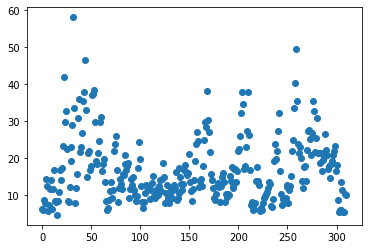

In [31]:
covid_mannheim_2020 = sorted_mannheimdata[sorted_mannheimdata['Refdatum'] <= '2020/12/31 00:00:00' ]

print(covid_mannheim_2020['AnzahlFall'].sum())

#plt.scatter(,new_list)
# corr,_= pearsonnr(,new_list)
#plt.plot(covid_mannheim_2020['Refdatum'],covid_mannheim_2020['AnzahlFall'])

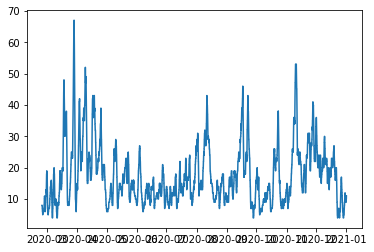

In [12]:
plt.plot(new_date,new['Feinstaub (PM₁₀) stündlich gleitendes Tagesmittel in µg/m³'])